# Analyzing the Chicago Public Schools - Progress Report Cards (2011-2012) data-set using SQL and Python

The city of Chicago released a dataset showing all school level performance data used to create School Report Cards for the 2011-2012 school year. The dataset is available from the Chicago Data Portal: [https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t](https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

This dataset includes a large number of metrics. Start by familiarizing yourself with the types of metrics in the database: [https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?download=true](https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01&download=true&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)



### Connect to the database

Let us now load the ipython-sql  extension and establish a connection with the database

In [1]:
import sqlite3

con = sqlite3.connect("PublicSchools.db")
cur = con.cursor()

In [2]:
%load_ext sql

In [3]:
%sql sqlite:///PublicSchools.db

### Store the dataset in a Table
 
##### To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the csv files  from the given url  into pandas dataframes

##### Next we will be using the  df.to_sql() function to convert each csv file  to a table in sqlite  with the csv data loaded in it.


In [4]:
import pandas

df = pandas.read_csv("https://data.cityofchicago.org/resource/9xs2-f89t.csv")
df.to_sql("CHICAGO_PUBLIC_SCHOOLS_DATA", con, if_exists='replace', index=False, method="multi")


566

In [5]:
df.head()

,school_id,name_of_school,elementary_or_high_school,street_address,city,state,zip_code,phone_number,link_,network_manager,...,rcdts_code,x_coordinate,y_coordinate,latitude,longitude,community_area_number,community_area_name,ward,police_district,location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,150000000000000,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,150000000000000,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,150000000000000,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,150000000000000,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,150000000000000,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"


### Query the database system catalog to retrieve table metadata

##### You can verify that the table creation was successful by retrieving the list of all tables in your schema and checking whether the SCHOOLS table was created


In [6]:
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///PublicSchools.db
Done.


name
CENSUS_DATA
CHICAGO_PUBLIC_SCHOOLS_DATA


### Query the database system catalog to retrieve column metadata



In [7]:
%sql SELECT count(name) as number_columns FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS_DATA');


 * sqlite:///PublicSchools.db
Done.


number_columns
79


### Retrieve the the list of columns in SCHOOLS table and their column type (datatype) and length.


In [8]:
%sql SELECT name,type,length(type) FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS_DATA');


 * sqlite:///PublicSchools.db
Done.


name,type,length(type)
school_id,INTEGER,7
name_of_school,TEXT,4
elementary_or_high_school,TEXT,4
street_address,TEXT,4
city,TEXT,4
state,TEXT,4
zip_code,INTEGER,7
phone_number,TEXT,4
link_,TEXT,4
network_manager,TEXT,4


### How many Elementary Schools are in the dataset?


In [9]:
%sql select count(*) as Number_Elementary_Schools from CHICAGO_PUBLIC_SCHOOLS_DATA where "elementary_or_high_school"='ES'

 * sqlite:///PublicSchools.db
Done.


Number_Elementary_Schools
462


### What is the highest Safety Score?


In [10]:

%sql select MAX(Safety_Score) AS MAX_SAFETY_SCORE from CHICAGO_PUBLIC_SCHOOLS_DATA

 * sqlite:///PublicSchools.db
Done.


MAX_SAFETY_SCORE
99.0


### Which schools have highest Safety Score?


In [11]:
# In the previous problem we found out that the highest Safety Score is 99, so we can use that as an input in the where clause:

%sql select Name_of_School, Safety_Score from CHICAGO_PUBLIC_SCHOOLS_DATA where Safety_Score = 99

# or, a better way:

%sql select Name_of_School, Safety_Score from CHICAGO_PUBLIC_SCHOOLS_DATA where \
  Safety_Score= (select MAX(Safety_Score) from CHICAGO_PUBLIC_SCHOOLS_DATA)


 * sqlite:///PublicSchools.db
Done.
 * sqlite:///PublicSchools.db
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99.0
Alexander Graham Bell Elementary School,99.0
Annie Keller Elementary Gifted Magnet School,99.0
Augustus H Burley Elementary School,99.0
Edgar Allan Poe Elementary Classical School,99.0
Edgebrook Elementary School,99.0
Ellen Mitchell Elementary School,99.0
James E McDade Elementary Classical School,99.0
James G Blaine Elementary School,99.0
LaSalle Elementary Language Academy,99.0


### What are the top 10 schools with the highest "Average Student Attendance"?


In [12]:
%sql select Name_of_School, Average_Student_Attendance from CHICAGO_PUBLIC_SCHOOLS_DATA \
    order by Average_Student_Attendance desc nulls last limit 10 

 * sqlite:///PublicSchools.db
Done.


name_of_school,average_student_attendance
John Charles Haines Elementary School,98.4
James Ward Elementary School,97.8
Edgar Allan Poe Elementary Classical School,97.6
Orozco Fine Arts & Sciences Elementary School,97.6
Rachel Carson Elementary School,97.6
Annie Keller Elementary Gifted Magnet School,97.5
Andrew Jackson Elementary Language Academy,97.4
Lenart Elementary Regional Gifted Center,97.4
Disney II Magnet School,97.3
John H Vanderpoel Elementary Magnet School,97.2


### Retrieve the list of 5 Schools with the lowest Average Student Attendance sorted in ascending order based on attendance


In [13]:
%sql SELECT Name_of_School, Average_Student_Attendance  \
     from CHICAGO_PUBLIC_SCHOOLS_DATA \
     order by Average_Student_Attendance \
     LIMIT 5

 * sqlite:///PublicSchools.db
Done.


name_of_school,average_student_attendance
Velma F Thomas Early Childhood Center,None
Richard T Crane Technical Preparatory High School,57.9
Barbara Vick Early Childhood & Family Center,60.9
Dyett High School,62.5
Wendell Phillips Academy High School,63.0


### Which Schools have Average Student Attendance lower than 70%?


In [14]:
%sql SELECT Name_of_School, Average_Student_Attendance  \
     from CHICAGO_PUBLIC_SCHOOLS_DATA \
     where CAST ( REPLACE(Average_Student_Attendance, '%', '') AS DOUBLE ) < 70 \
     order by Average_Student_Attendance

 * sqlite:///PublicSchools.db
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.9
Barbara Vick Early Childhood & Family Center,60.9
Dyett High School,62.5
Wendell Phillips Academy High School,63.0
Orr Academy High School,66.3
Manley Career Academy High School,66.8
Chicago Vocational Career Academy High School,68.8
Roberto Clemente Community Academy High School,69.6


### The total College Enrollment for each Community Area


In [15]:
%sql select Community_Area_Name, sum(college_enrollment_number_of_students_) AS TOTAL_ENROLLMENT \
   from CHICAGO_PUBLIC_SCHOOLS_DATA \
   group by Community_Area_Name 

 * sqlite:///PublicSchools.db
Done.


community_area_name,TOTAL_ENROLLMENT
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175
AUSTIN,10933
AVALON PARK,1522
AVONDALE,3640
BELMONT CRAGIN,14386
BEVERLY,1636


 * sqlite:///PublicSchools.db
Done.


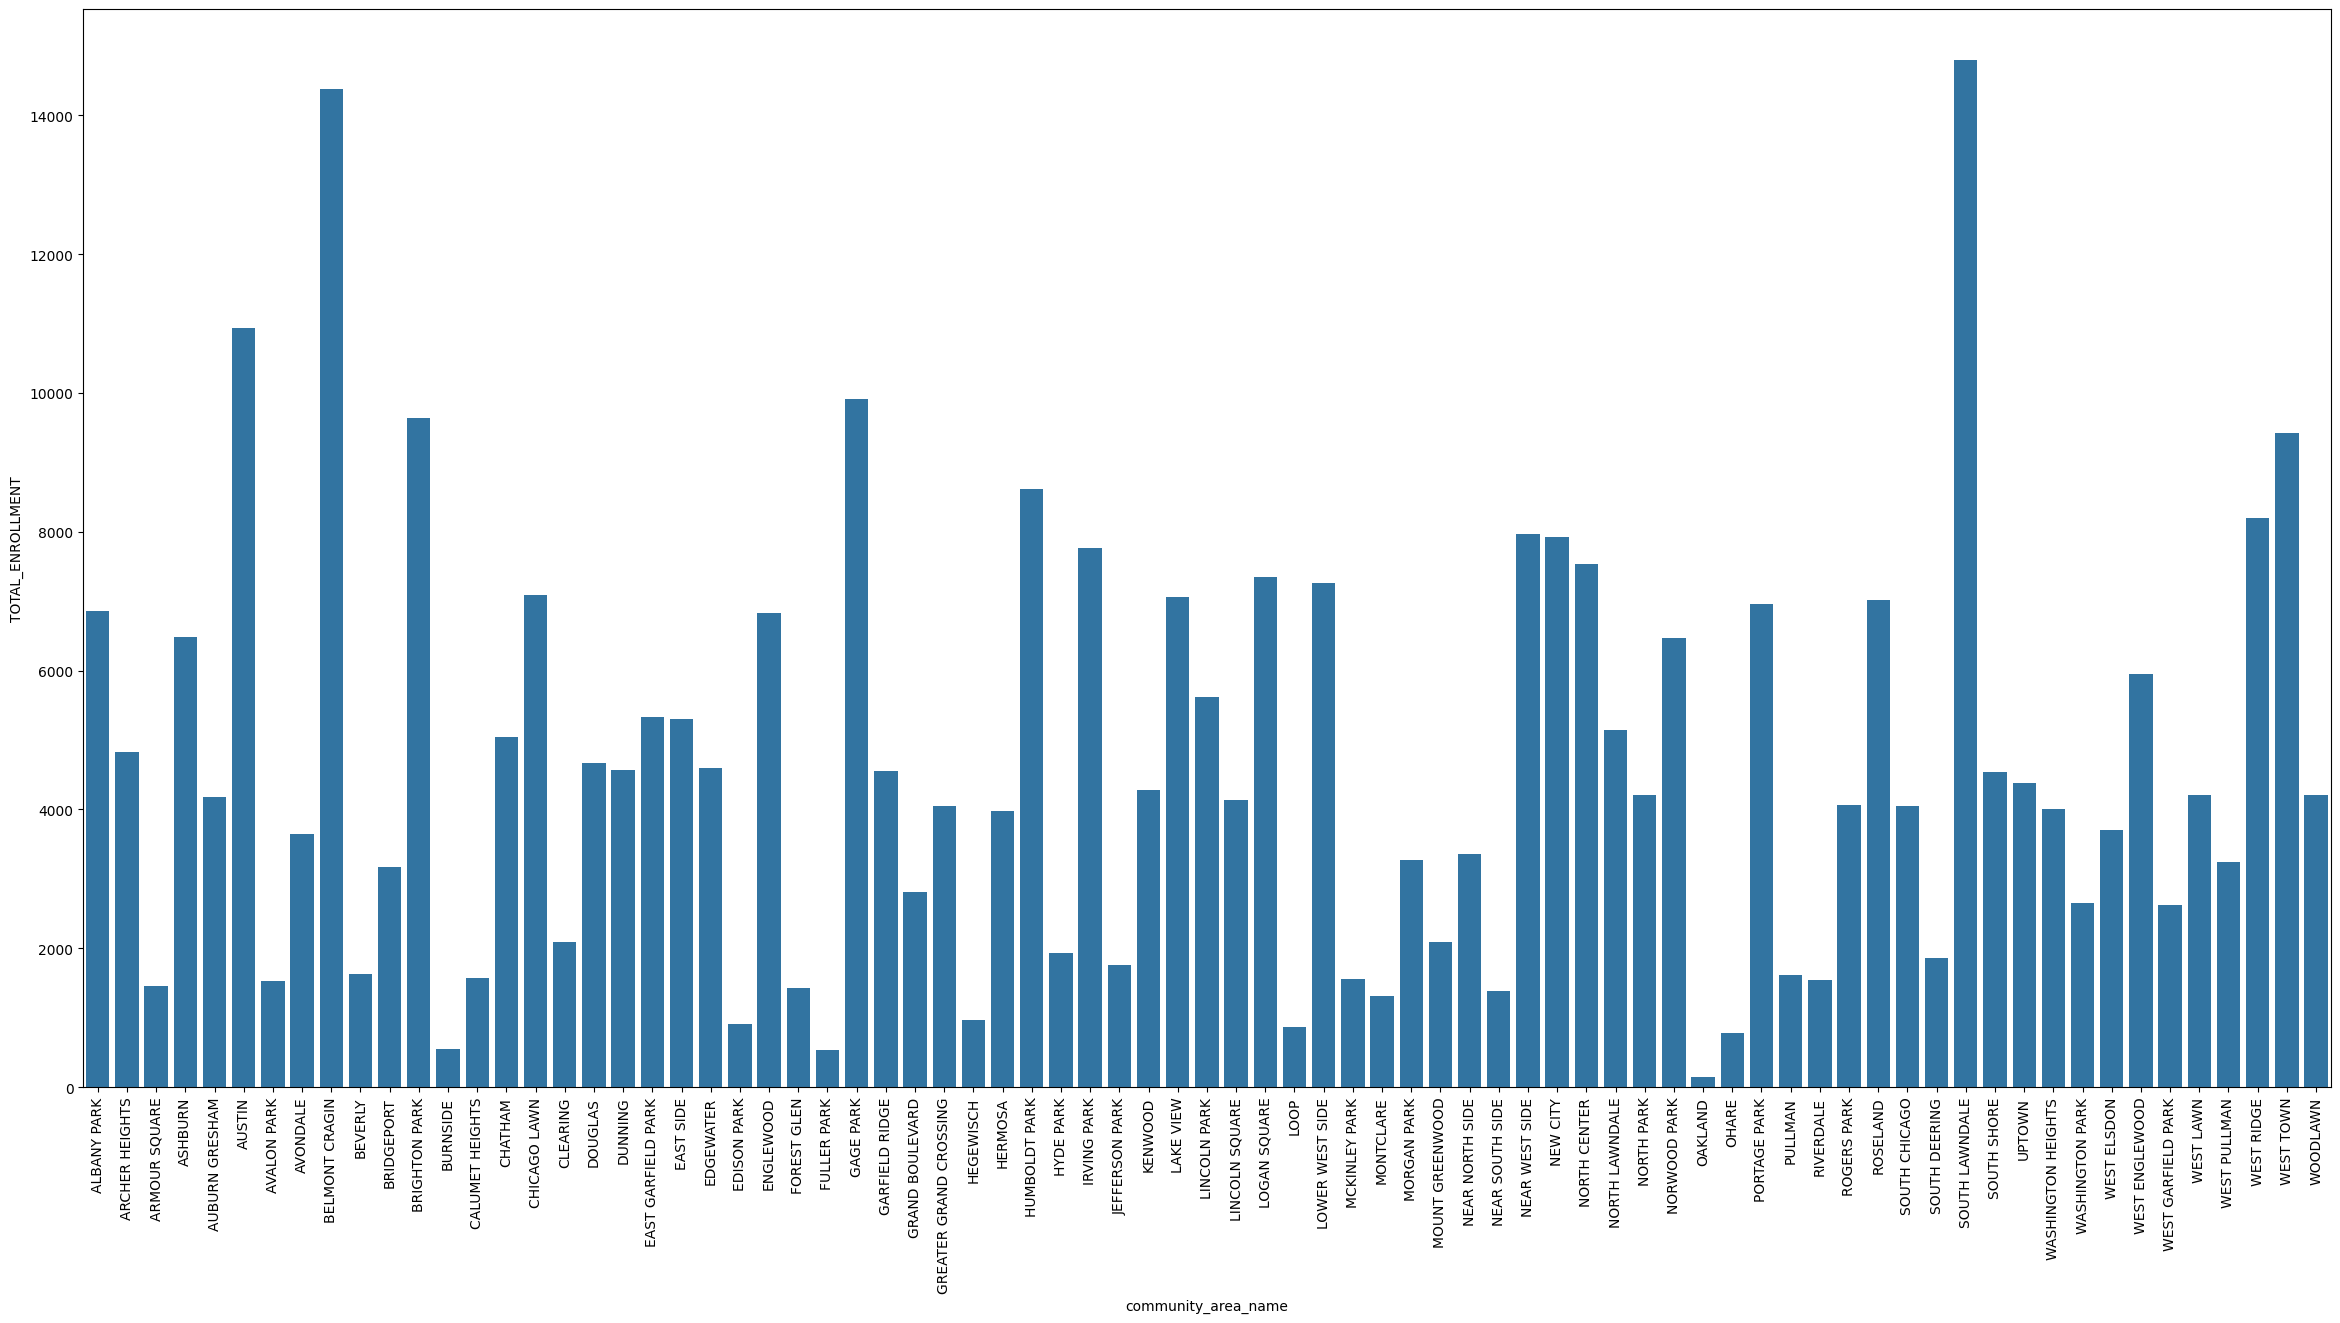

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
total_enrollement_per_community_area= %sql select Community_Area_Name, sum(college_enrollment_number_of_students_) AS TOTAL_ENROLLMENT \
   from CHICAGO_PUBLIC_SCHOOLS_DATA \
   group by Community_Area_Name ;
total_enrollement_per_community_area_df=total_enrollement_per_community_area.DataFrame()
palette_color = sns.color_palette('dark') 

fig, ax = plt.subplots(figsize=(29,14))
sns.barplot(ax=ax, x = 'community_area_name',
            y = 'TOTAL_ENROLLMENT',
            data = total_enrollement_per_community_area_df)
ax.tick_params(axis='x', rotation=90)
 
plt.show() 


### The 5 Community Areas with the least total College Enrollment  sorted in ascending order


In [17]:
%sql select Community_Area_Name, sum(college_enrollment_number_of_students_) AS TOTAL_ENROLLMENT \
   from CHICAGO_PUBLIC_SCHOOLS_DATA \
   group by Community_Area_Name \
   order by TOTAL_ENROLLMENT asc \
   LIMIT 5 

 * sqlite:///PublicSchools.db
Done.


community_area_name,TOTAL_ENROLLMENT
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


### List 5 schools with lowest safety score.


In [18]:
%sql SELECT name_of_school, safety_score \
FROM CHICAGO_PUBLIC_SCHOOLS_DATA  where safety_score !='None' \
ORDER BY safety_score \
LIMIT 5

 * sqlite:///PublicSchools.db
Done.


name_of_school,safety_score
Edmond Burke Elementary School,1.0
Luke O'Toole Elementary School,5.0
George W Tilton Elementary School,6.0
Foster Park Elementary School,11.0
Emil G Hirsch Metropolitan High School,13.0


### The hardship index for the community area of the school which has College Enrollment of 4368


In [19]:
df= pandas.read_csv("https://data.cityofchicago.org/resource/kn9c-c2s2.csv")
df.to_sql("CENSUS_DATA", con, if_exists='replace', index=False, method="multi")

78

In [20]:
%%sql 
select hardship_index from CENSUS_DATA CD, CHICAGO_PUBLIC_SCHOOLS_DATA CPS 
where CD.ca = CPS.community_area_number 
and college_enrollment_number_of_students_ = 4368

 * sqlite:///PublicSchools.db
Done.


hardship_index
6.0


### The hardship index for the community area which has the highest value for College Enrollment


In [48]:
%sql select ca as community_area_number, community_area_name, hardship_index from CENSUS_DATA \
   where ca in \
   ( select community_area_number from CHICAGO_PUBLIC_SCHOOLS_DATA order by college_enrollment_number_of_students_ desc limit 1 )

 * sqlite:///PublicSchools.db
Done.


community_area_number,community_area_name,hardship_index
5.0,North Center,6.0


## Conclusion
In this analysis, we explored the Chicago Public Schools (CPS) Progress Report Cards dataset for the 2011-2012 school year. By leveraging SQL and Python, we examined various performance metrics to gain insights into the academic and operational standing of different schools across the district.

Our exploration began with understanding the diverse range of metrics available in the dataset, which included key indicators such as student attendance rates, graduation rates, and standardized test scores. Through SQL queries, we extracted and analyzed relevant data points, providing a foundation for more detailed visualizations and statistical analyses.

The analysis revealed notable patterns in school performance, such as the correlation between socio-economic factors and academic outcomes, as well as disparities in performance across different school types (e.g., elementary vs. high schools). These insights can inform future educational policies and resource allocation within CPS to enhance overall student achievement.

However further analysis has to be done in relation with other datasets to further understand more about these socio-economic factors. 